
# Detecting Fraudulent Transaction using Machine Learning Model
#### Objectives

#### The objective of this project is to develop a model for predicting fraudulent transaction for a financial company and use insight from the model to develop an actionable plan.

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataprep as prep

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


IMPORTING AND UNDERSTANDING DATASET 

In [133]:
FT_Data = pd.read_csv('Fraud_Transaction.csv.csv')


In [134]:
FT_Data.head() #shows the first five rows of the dataset

,step,type (str),type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Outcome,Outcome(str)
0,1,PAYMENT,0,1.361982e+09,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Non-Fraudulent
1,1,PAYMENT,0,1.864280e+03,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Non-Fraudulent
2,1,TRANSFER,1,1.810000e+02,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent
3,1,CASH_OUT,2,1.810000e+02,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent
4,1,PAYMENT,0,1.166814e+04,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Non-Fraudulent


In [135]:
FT_Data.tail() #shows the last rows of the dataset

,step,type (str),type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Outcome,Outcome(str)
1048570,95,CASH_OUT,2,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,Non-Fraudulent
1048571,95,PAYMENT,0,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,Non-Fraudulent
1048572,95,PAYMENT,0,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,Non-Fraudulent
1048573,95,PAYMENT,0,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,Non-Fraudulent
1048574,95,PAYMENT,0,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,Non-Fraudulent


<h4>Description of Features</h4>
<ol>
    <li>Step: maps unit of time in real world, </li>
    <li>Type: the type of transaction</li>
    <li>Amount: Amount of transaction in local currency</li>
    <li>NameOrig: Customer who started the transaction </li>
    <li>OldbalanceOrg initail balance before transaction</li>
    <li>newbalanceOrig: new balance after transaction</li>
    <li>NameDest: Custmer who is the recipient of the transaction </li>
    <li>oldbalanceDest: initial balance of recipient before transaction</li>
    <li>newbalanceDest: initial balance of recipient after transaction </li>
    <li>Outcome: the outcome of the prediction</li>
</ol>

In [136]:
FT_Data.shape #there are 1048575 rows and 11 columns

(1048575, 12)

In [137]:
FT_Data.columns #these are the columns headers

Index(['step', 'type (str)', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'Outcome', 'Outcome(str)'],
      dtype='object')

In [138]:
FT_Data.info() #Here we get the datatype of each column and also the number of available values and non-available value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type (str)      1048575 non-null  object 
 2   type            1048575 non-null  int64  
 3   amount          1048575 non-null  float64
 4   nameOrig        1048575 non-null  object 
 5   oldbalanceOrg   1048575 non-null  float64
 6   newbalanceOrig  1048575 non-null  float64
 7   nameDest        1048575 non-null  object 
 8   oldbalanceDest  1048575 non-null  float64
 9   newbalanceDest  1048575 non-null  float64
 10  Outcome         1048575 non-null  int64  
 11  Outcome(str)    1048575 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 96.0+ MB


In [139]:
FT_Data.nunique() #Unique values

step                   95
type (str)              5
type                    5
amount            1009607
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
Outcome                 2
Outcome(str)            2
dtype: int64

In [140]:
FT_Data.describe().T #Provide a statistics summary of data belonging to numerical datatype such as int, float

,count,mean,std,min,25%,50%,75%,max
step,1048575.0,2.696617e+01,1.562325e+01,1.0,15.000,20.00,39.000,9.500000e+01
type,1048575.0,1.682368e+00,1.484939e+00,0.0,0.000,2.00,2.000,4.000000e+00
amount,1048575.0,1.599659e+05,1.356040e+06,0.1,12149.135,76343.93,213762.065,1.361982e+09
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,3.890000e+07
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,3.890000e+07
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,4.210000e+07
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,4.220000e+07
Outcome,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.000000e+00


DATA PREPARATION 

In [141]:
from dataprep.clean import clean_headers
FT_Data = clean_headers(FT_Data, case='title')

Column Headers Cleaning Report:
	10 values cleaned (83.33%)


In [142]:
FT_Data.isnull().sum() #finding missing values


Step               0
Type (str)         0
Type               0
Amount             0
Name Orig          0
Oldbalance Org     0
Newbalance Orig    0
Name Dest          0
Oldbalance Dest    0
Newbalance Dest    0
Outcome            0
Outcome(str)       0
dtype: int64

In [143]:
FT_Data.duplicated().sum() #finding duplicates value

0

In [144]:
#FT_Data.drop_duplicates() #removing duplicates

In [145]:
#separate Categorical features from Numeric feature for easy exploratiion
cat_cols=FT_Data.select_dtypes(include=['object']).columns
num_cols = FT_Data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Type (str)', 'Name Orig', 'Name Dest', 'Outcome(str)'], dtype='object')
Numerical Variables:
['Step', 'Type', 'Amount', 'Oldbalance Org', 'Newbalance Orig', 'Oldbalance Dest', 'Newbalance Dest', 'Outcome']


AttributeError: 'AxesSubplot' object has no attribute 'unique'

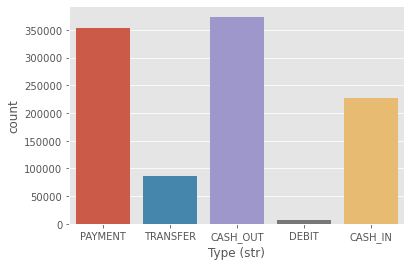

In [146]:
sns.countplot(FT_Data['Type (str)']).unique()

In [ ]:
Transaction_Type_counts.index.name = 'Type (str)'
Transaction_Type_counts

In [ ]:
#percentage of transaction type from the database
values = FT_Data['Type'].value_counts().values
labels = FT_Data['Type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

In [ ]:
#percentage of fraudulent and non-fraudulent transaction from the database
values = FT_Data['Outcome'].value_counts().values
labels = ['Not Fraud','Fraud']
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

In [ ]:
fraud = FT_Data['Outcome'].value_counts()
fraud.to_frame()

from the above diagram we found out the dataset is  highly unbalanced because the percentahe of the fraudulent transaction is just 0.1% of the entire dataset, 
Classifiers learn better from a balanced distibution.

MODEL DEVELOPMENT

In [147]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats  
import imblearn

Note: The target variable of our machine learning models is predominantly imbalanced
which may hamper the predictive accuracy of the models as the predictions may be 
solely made on the basis of the 'majority class',
thereby completely neglecting the 'minority class' as a consequence.

In [148]:
FT_Data.head()

,Step,Type (str),Type,Amount,Name Orig,Oldbalance Org,Newbalance Orig,Name Dest,Oldbalance Dest,Newbalance Dest,Outcome,Outcome(str)
0,1,PAYMENT,0,1.361982e+09,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Non-Fraudulent
1,1,PAYMENT,0,1.864280e+03,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Non-Fraudulent
2,1,TRANSFER,1,1.810000e+02,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent
3,1,CASH_OUT,2,1.810000e+02,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent
4,1,PAYMENT,0,1.166814e+04,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Non-Fraudulent


In [149]:
FT_Data = FT_Data.drop(columns=['Type (str)','Outcome(str)','Name Orig','Name Dest'])
FT_Data

,Step,Type,Amount,Oldbalance Org,Newbalance Orig,Oldbalance Dest,Newbalance Dest,Outcome
0,1,0,1.361982e+09,170136.00,160296.36,0.00,0.00,0
1,1,0,1.864280e+03,21249.00,19384.72,0.00,0.00,0
2,1,1,1.810000e+02,181.00,0.00,0.00,0.00,1
3,1,2,1.810000e+02,181.00,0.00,21182.00,0.00,1
4,1,0,1.166814e+04,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
1048570,95,2,1.325574e+05,479803.00,347245.65,484329.37,616886.72,0
1048571,95,0,9.917360e+03,90545.00,80627.64,0.00,0.00,0
1048572,95,0,1.414005e+04,20545.00,6404.95,0.00,0.00,0
1048573,95,0,1.002005e+04,90605.00,80584.95,0.00,0.00,0


#### Splitting the dataset into features and target set

In [150]:
x = FT_Data.drop(columns=['Outcome'])
y = FT_Data['Outcome']

In [151]:
x.head()

,Step,Type,Amount,Oldbalance Org,Newbalance Orig,Oldbalance Dest,Newbalance Dest
0,1,0,1.361982e+09,170136.0,160296.36,0.0,0.0
1,1,0,1.864280e+03,21249.0,19384.72,0.0,0.0
2,1,1,1.810000e+02,181.0,0.00,0.0,0.0
3,1,2,1.810000e+02,181.0,0.00,21182.0,0.0
4,1,0,1.166814e+04,41554.0,29885.86,0.0,0.0


In [152]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Step             1048575 non-null  int64  
 1   Type             1048575 non-null  int64  
 2   Amount           1048575 non-null  float64
 3   Oldbalance Org   1048575 non-null  float64
 4   Newbalance Orig  1048575 non-null  float64
 5   Oldbalance Dest  1048575 non-null  float64
 6   Newbalance Dest  1048575 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 56.0 MB


In [153]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

### Dealing with imbalance dataset using SMOTE (synthetic ) technique   

In [154]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [155]:
x, y = smote.fit_resample(x,y)

#### splitting into training and testing set

In [156]:
from sklearn.model_selection import train_test_split
x.train,x.test,y.train,y.test = train_test_split(x,y,test_size=0.3, random_state=10)

#### Training the the model 

In [158]:
model = LogisticRegression()
model.fit(x.train,y.train)
model_pred = model.predict(x.test)

#### Checking the accuracy of the model

In [159]:
print('F1 Score:',f1_score(y.test,model_pred))
print('Accuracy Score:',accuracy_score(y.test,model_pred))
pd.crosstab(y.test,model_pred)

F1 Score: 0.945024432031069
Accuracy Score: 0.9437338891894472


col_0,0,1
Outcome,,
0,289173,25265
1,10096,303926


In [178]:
289173+25265

314438

In [182]:
 289173/314438

0.9196502967198621

#### The accuracy for Non-Fraudulet transaction is 91.96%

In [183]:
10096+303926

314022

In [184]:
303926/314022

0.9678493863487272

#### The accuracy for Fraudulent transaction  is 96.78%

#  CREATING A SYSTEM FOR PREDICTION
#### using this system we are going to randomly pick a row from the training dataset and predict its Outcome to see how well our model has learnt.

In [189]:
## this is the record we are using 
#0 	1 	0 	1.361982e+09 	170136.00 	160296.36 	0.00 	0.00 	0
# as we can see the outcome is O which is non-fraudulent 
input_data = (1,0,1.361982e+09,170136.0,160296.36,0.0,0.0)

#Now i need to change the data(input_data) from tuple to numpy array; so that it can be mutable

input_data_numpy_array = np.asarray(input_data)

#now I reshape

input_data_reshape = input_data_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
#now predict

prediction

if(prediction[0]==0):
    print(' This is a Non-Fraudulent Transaction')
else:
    print('Warning! Warning!! Warning!!! This is a Fraudulent Transaction')

 This is a Non-Fraudulent Transaction
